# Pill Classification using mobile net 

In [78]:
## library  as tf
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import numpy as np
import os
import re
from PIL import Image
import shutil
import xml.etree.ElementTree as et
import random
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

## library import
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

import tensorflow.keras as keras
from tensorflow.keras.layers import *
from tensorflow.keras.models import * 
from tensorflow.keras.preprocessing import image
from sklearn.metrics import confusion_matrix, roc_curve
import seaborn as sns


import numpy as np
import pandas as pd
import os
import re
from PIL import Image
import shutil
from sklearn.model_selection import train_test_split
import random
import matplotlib.pyplot as plt


### Dataset preparation

In [79]:
current_directory = os.getcwd()
print("현재 경로:", current_directory)

현재 경로: /Users/seyeong/workspace/drugmaster_pillClassification/PillClassification


In [80]:
data_dir = 'test_augmented_images'
train = 'train'
validation = 'validation'
test = 'test'

aug_data_dir = os.path.join(data_dir)
print(aug_data_dir)
image_dir = os.path.join(train, 'rectangle_img')
print(image_dir)
bbox_dir = os.path.join(train, 'rectangle_annotation')
print(bbox_dir)

val_img_dir = os.path.join(validation, 'rectangle_img')
val_bbox_dir = os.path.join(validation, 'rectangle_annotation')

test_img_dir = os.path.join(test, 'rectangle_img')
test_bbox_dir = os.path.join(test, 'rectangle_annotation')

test_augmented_images
train/rectangle_img
train/rectangle_annotation


In [81]:
# train set split
for file in os.listdir(aug_data_dir):
    file_format = re.split('[.]',file)[-1]
    if file_format=='jpg':
        shutil.copy(os.path.join(aug_data_dir, file), os.path.join(image_dir, file))
    else:
        shutil.copy(os.path.join(aug_data_dir, file), os.path.join(bbox_dir, file))

# validation set split
for file in os.listdir('validation_raw'):
    file_format = re.split('[.]',file)[-1]
    if file_format=='jpg':
        shutil.copy(os.path.join('validation_raw', file), os.path.join(val_img_dir, file))
    else:
        shutil.copy(os.path.join('validation_raw', file), os.path.join(val_bbox_dir, file))

# test set split
for file in os.listdir('test_raw'):
    file_format = re.split('[.]',file)[-1]
    if file_format=='jpg':
        shutil.copy(os.path.join('test_raw', file), os.path.join(test_img_dir, file))
    else:
        shutil.copy(os.path.join('test_raw', file), os.path.join(test_bbox_dir, file))

In [82]:
## image file 수 확인
image_files = [fname for fname in os.listdir(image_dir) if os.path.splitext(fname)[-1] == '.jpg']
print(len(image_files))
image_files[:5]

40000


['ApurtranTablet150mg(Irbesartan)_0_augmented_image_333.jpg',
 'LipinonTablet80mg(AtorvastatinCalciumTrihydrate)_1_augmented_image_519.jpg',
 'GasridTablet5mg(MosaprideCitrateHydrate)_1_augmented_image_826.jpg',
 'GasbetTablet5mg(MosaprideCitrateHydrate)_1_augmented_image_480.jpg',
 'NumentaminSustainedReleaseCapsule8mg(GalantamineBromide)_0_augmented_image_678.jpg']

In [83]:
# class수 확인
class_list = set()
for image_file in image_files:
    file_name = re.split('_',image_file)[0]
    class_list.add(file_name)

class_list = list(class_list)
print(len(class_list))

20


In [84]:
class_list.sort()
class_list[:5]

['ApurtranTablet150mg(Irbesartan)',
 'BalsanTablet80mg(Valsartan)',
 'BalthrepTablet160mg(Valsartan)',
 'DiosartanTablet160mg(Valsartan)',
 'EscitalTablet5mg(EscitalopramOxalate)']

In [85]:
class2idx = {cls:idx for idx, cls in enumerate(class_list)}
class2idx['ApurtranTablet150mg(Irbesartan)']

0

In [87]:
train_images = os.listdir(image_dir)
val_images = os.listdir(val_img_dir)
test_images = os.listdir(test_img_dir)

print(len(train_images), len(val_images), len(test_images))

40000 8000 8000


In [88]:
train_images[:10]

['ApurtranTablet150mg(Irbesartan)_0_augmented_image_333.jpg',
 'LipinonTablet80mg(AtorvastatinCalciumTrihydrate)_1_augmented_image_519.jpg',
 'GasridTablet5mg(MosaprideCitrateHydrate)_1_augmented_image_826.jpg',
 'GasbetTablet5mg(MosaprideCitrateHydrate)_1_augmented_image_480.jpg',
 'NumentaminSustainedReleaseCapsule8mg(GalantamineBromide)_0_augmented_image_678.jpg',
 'SurosinDTablet(TamsulosinHydrochloride)_1_augmented_image_433.jpg',
 'BalsanTablet80mg(Valsartan)_0_augmented_image_473.jpg',
 'ApurtranTablet150mg(Irbesartan)_0_augmented_image_73.jpg',
 'EscitalTablet5mg(EscitalopramOxalate)_1_augmented_image_355.jpg',
 'ValsartelTablet80mg(Valsartan)_1_augmented_image_631.jpg']

In [89]:
val_images[:10]

['ApurtranTablet150mg(Irbesartan)_0_augmented_image_73.jpg',
 'LipinonTablet80mg(AtorvastatinCalciumTrihydrate)_0_augmented_image_7.jpg',
 'RosorodTablet10mg(RosuvastatinCalcium)_1_augmented_image_37.jpg',
 'ZolpidemSustainedReleaseTablet(ZolpidemTartrate)_1_augmented_image_157.jpg',
 'GasdialTablet50mg(DimethiconeMagnesium)_1_augmented_image_177.jpg',
 'FeratracTablet2.5mg(Letrozole)_1_augmented_image_151.jpg',
 'SarvaltanTablet160mg(Valsartan)_0_augmented_image_130.jpg',
 'ZolpidemSustainedReleaseTablet(ZolpidemTartrate)_1_augmented_image_2.jpg',
 'ValsartelTablet80mg(Valsartan)_1_augmented_image_157.jpg',
 'GasridTablet5mg(MosaprideCitrateHydrate)_1_augmented_image_198.jpg']

In [90]:
train_dir = os.path.join('train/rectangle_img')
val_dir = os.path.join('validation/rectangle_img') 
test_dir = os.path.join('test/rectangle_img') 

### TFRecord

In [91]:
IMG_SIZE = 100

In [97]:

## TFRecord 저장할 directory와 file 경로 설정
tfr_dir = os.path.join('tfrecord')
os.makedirs(tfr_dir, exist_ok=True)

tfr_train_dir = os.path.join(tfr_dir, 'cls_train.tfr')
tfr_val_dir = os.path.join(tfr_dir, 'cls_val.tfr')
tfr_test_dir = os.path.join(tfr_dir, 'cls_test.tfr')

In [98]:
import tensorflow as tf
## TFRecord writer 생성
writer_train = tf.io.TFRecordWriter(tfr_train_dir)
writer_val = tf.io.TFRecordWriter(tfr_val_dir)
writer_test = tf.io.TFRecordWriter(tfr_test_dir)

In [99]:
# The following functions can be used to convert a value to a type compatible
# with tf.Example.
# 데이터 직렬화

def _bytes_feature(value):
  """Returns a bytes_list from a string / byte."""
  if isinstance(value, type(tf.constant(0))):
    value = value.numpy() # BytesList won't unpack a string from an EagerTensor.
  return tf.train.Feature(bytes_list=tf.train.BytesList(value=[value]))

def _float_feature(value):
  """Returns a float_list from a float / double."""
  return tf.train.Feature(float_list=tf.train.FloatList(value=[value]))

def _int64_feature(value):
  """Returns an int64_list from a bool / enum / int / uint."""
  return tf.train.Feature(int64_list=tf.train.Int64List(value=[value]))

In [100]:
n_train = 0

train_files = os.listdir(train_dir)
for train_file in train_files:
  train_path = os.path.join(train_dir, train_file)
  image = Image.open(train_path)
  image = image.resize((IMG_SIZE, IMG_SIZE))
  bimage = image.tobytes()

  file_name = os.path.splitext(train_file)[0] #Bangal_101
  
  class_name = re.split('_',file_name)[0]
  class_num = class2idx[class_name]
  print(class_name)
  
  example = tf.train.Example(features=tf.train.Features(feature={
      'image': _bytes_feature(bimage),
      'cls_num': _int64_feature(class_num)
  }))
  writer_train.write(example.SerializeToString())
  n_train += 1

writer_train.close()
print(n_train)

ApurtranTablet150mg(Irbesartan)
LipinonTablet80mg(AtorvastatinCalciumTrihydrate)
GasridTablet5mg(MosaprideCitrateHydrate)
GasbetTablet5mg(MosaprideCitrateHydrate)
NumentaminSustainedReleaseCapsule8mg(GalantamineBromide)
SurosinDTablet(TamsulosinHydrochloride)
BalsanTablet80mg(Valsartan)
ApurtranTablet150mg(Irbesartan)
EscitalTablet5mg(EscitalopramOxalate)
ValsartelTablet80mg(Valsartan)
ValsartanTablet(Valsartan)
FeratracTablet2.5mg(Letrozole)
SarvaltanTablet160mg(Valsartan)
BalsanTablet80mg(Valsartan)
ExbanTablet80mg(Valsartan)
DiosartanTablet160mg(Valsartan)
LipinonTablet80mg(AtorvastatinCalciumTrihydrate)
ValsartelTablet160mg(Valsartan)
GasprenTablet(MosaprideCitrateDihydrate)
GasdialTablet50mg(DimethiconeMagnesium)
GasbetTablet5mg(MosaprideCitrateHydrate)
RosorodTablet10mg(RosuvastatinCalcium)
ZolpidemSustainedReleaseTablet(ZolpidemTartrate)
GasbetTablet5mg(MosaprideCitrateHydrate)
GasdialTablet50mg(DimethiconeMagnesium)
ZolpidemSustainedReleaseTablet(ZolpidemTartrate)
ValsartelTabl

In [101]:
n_val = 0

val_files = os.listdir(val_dir)
for val_file in val_files:
  val_path = os.path.join(val_dir, val_file)
  image = Image.open(val_path)
  image = image.resize((IMG_SIZE, IMG_SIZE))
  bimage = image.tobytes()

  file_name = os.path.splitext(val_file)[0] #Bangal_101
  class_name = re.split('_',file_name)[0]
  class_num = class2idx[class_name]

  example = tf.train.Example(features=tf.train.Features(feature={
      'image': _bytes_feature(bimage),
      'cls_num': _int64_feature(class_num)
  }))
  writer_val.write(example.SerializeToString())
  n_val += 1

writer_val.close()
print(n_val)

8000


In [103]:
n_test = 0

test_files = os.listdir(test_dir)
for test_file in test_files:
  test_path = os.path.join(test_dir, test_file)
  image = Image.open(test_path)
  image = image.resize((IMG_SIZE, IMG_SIZE))
  bimage = image.tobytes()

  file_name = os.path.splitext(test_file)[0] #Bangal_101
  class_name = re.split('_',file_name)[0]
  class_num = class2idx[class_name]

  example = tf.train.Example(features=tf.train.Features(feature={
      'image': _bytes_feature(bimage),
      'cls_num': _int64_feature(class_num)
  }))
  writer_test.write(example.SerializeToString())
  n_test += 1

writer_test.close()
print(n_test)

8000


### Classification

In [106]:
## Hyper Parameters
N_CLASS = len(class_list)
N_EPOCHS = 30
N_BATCH = 40
N_TRAIN = n_train
N_VAL = n_val
IMG_SIZE = 100
learning_rate = 0.0001
steps_per_epoch = N_TRAIN / N_BATCH#STEPS_PER_EPOCH =n_train//batch_size # len(train_data) // batch_size
validation_steps = int(np.ceil(N_VAL / N_BATCH))#VALIDATION_STEPS = n_val//batch_size # len(valid_data) // batch_size

In [104]:
## tfrecord file을 data로 parsing해주는 function
def _parse_function(tfrecord_serialized):
    features={'image': tf.io.FixedLenFeature([], tf.string),
              'cls_num': tf.io.FixedLenFeature([], tf.int64)
             }
    parsed_features = tf.io.parse_single_example(tfrecord_serialized, features)
    
    image = tf.io.decode_raw(parsed_features['image'], tf.uint8)
    image = tf.reshape(image, [IMG_SIZE, IMG_SIZE, 3])
    image = tf.cast(image, tf.float32)/255. 

    label = tf.cast(parsed_features['cls_num'], tf.int64)
    label = tf.one_hot(label, N_CLASS)

    return image, label

In [107]:
## train dataset 만들기
train_dataset = tf.data.TFRecordDataset(tfr_train_dir)
train_dataset = train_dataset.map(_parse_function, num_parallel_calls=tf.data.experimental.AUTOTUNE)
train_dataset = train_dataset.shuffle(buffer_size=N_TRAIN).prefetch(
    tf.data.experimental.AUTOTUNE).batch(N_BATCH).repeat()

In [108]:
## validation dataset 만들기
val_dataset = tf.data.TFRecordDataset(tfr_val_dir)
val_dataset = val_dataset.map(_parse_function, num_parallel_calls=tf.data.experimental.AUTOTUNE)
val_dataset = val_dataset.batch(N_BATCH).repeat()

In [109]:
## test dataset 만들기
test_dataset = tf.data.TFRecordDataset(tfr_test_dir)
test_dataset = test_dataset.map(_parse_function, num_parallel_calls=tf.data.experimental.AUTOTUNE)
test_dataset = test_dataset.batch(N_BATCH).repeat()

2024-10-06 20:21:45.691485: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [1]
	 [[{{node Placeholder/_0}}]]
2024-10-06 20:21:45.691866: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [1]
	 [[{{node Placeholder/_0}}]]
2024-10-06 20:21:45.731450: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


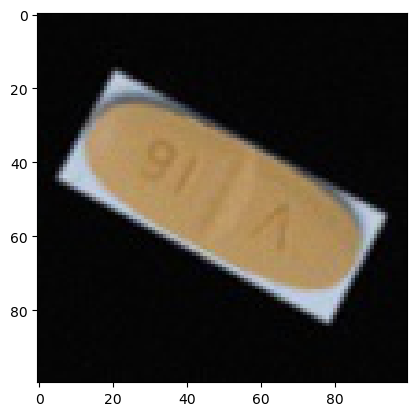

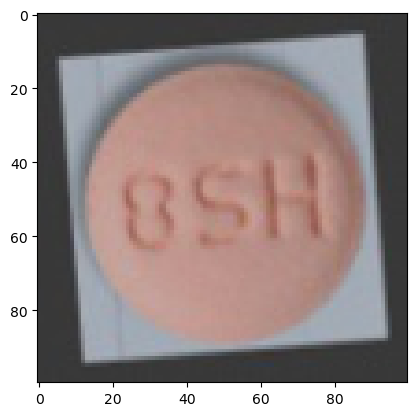

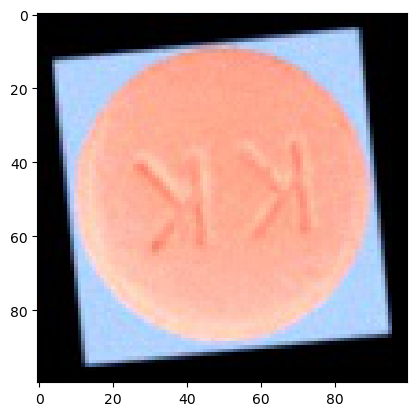

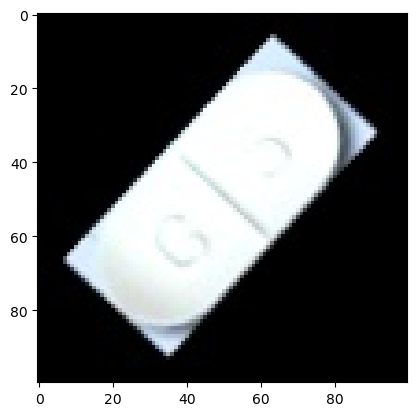

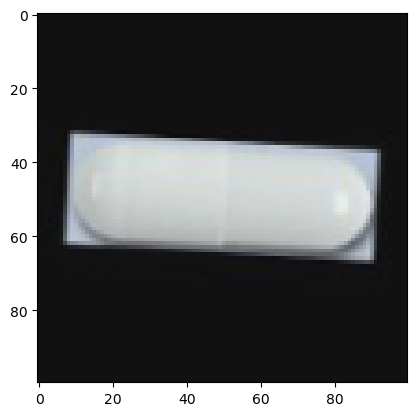

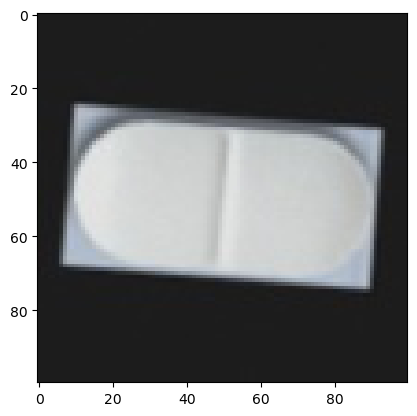

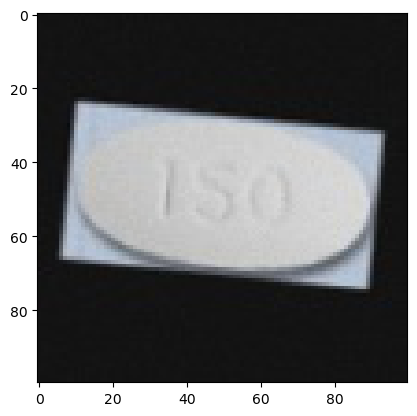

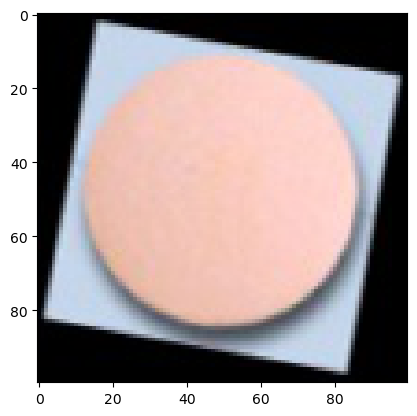

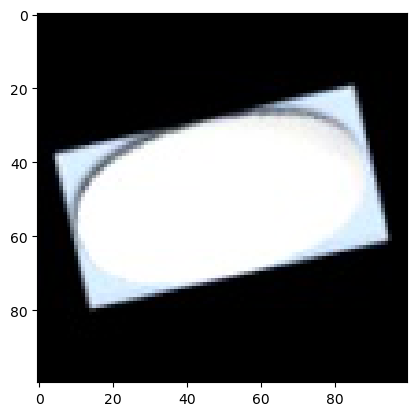

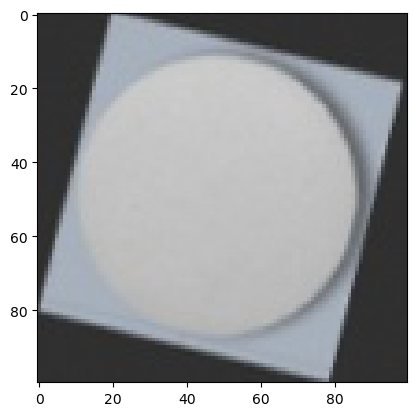

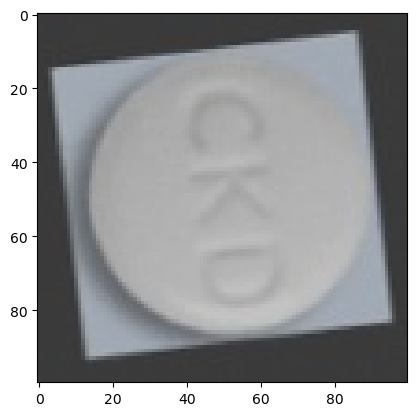

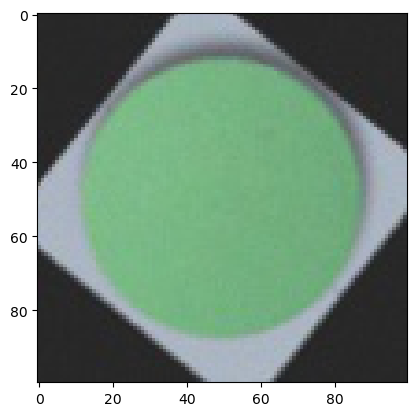

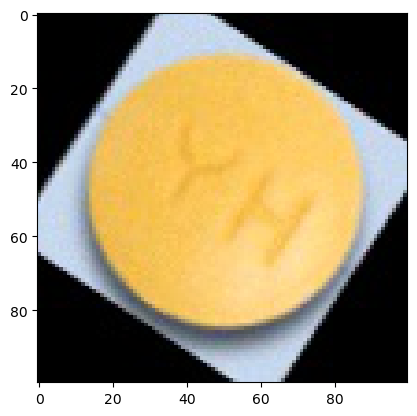

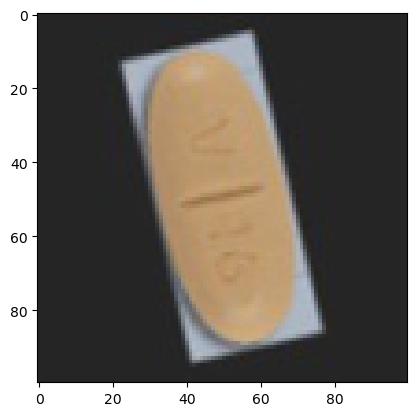

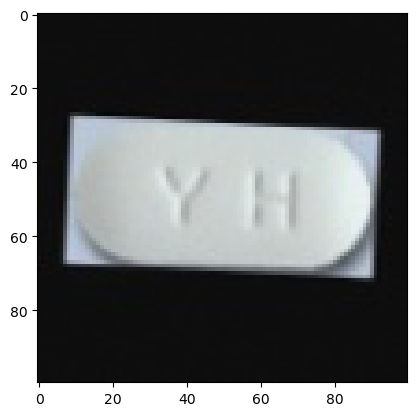

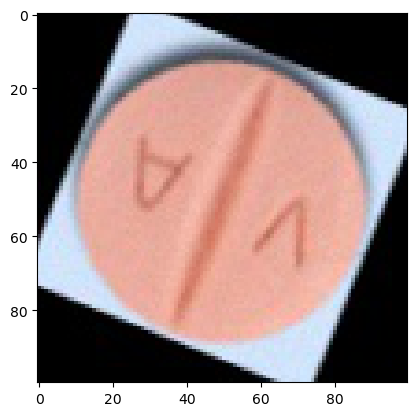

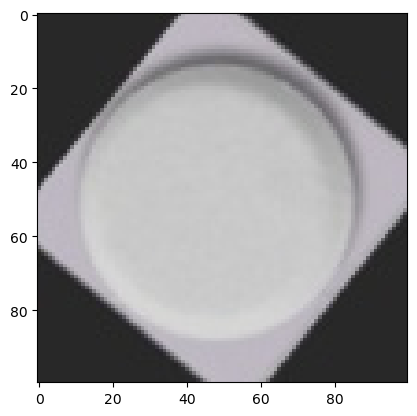

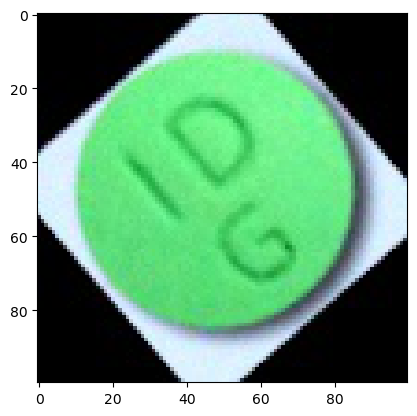

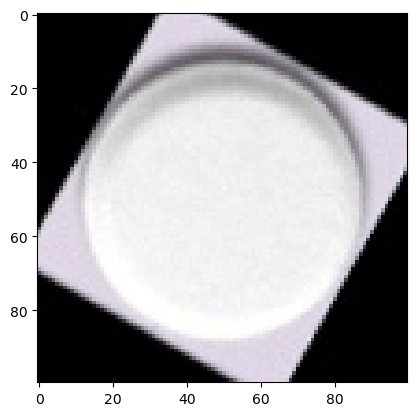

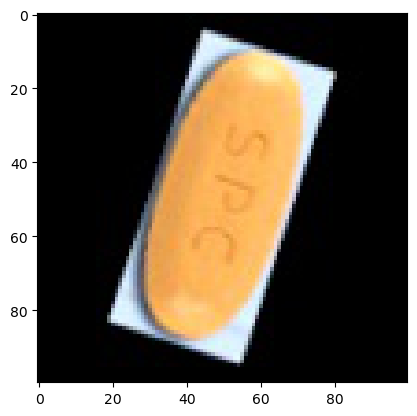

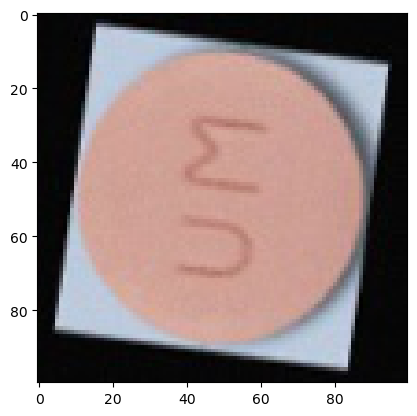

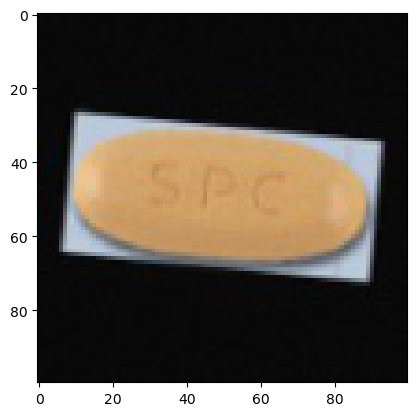

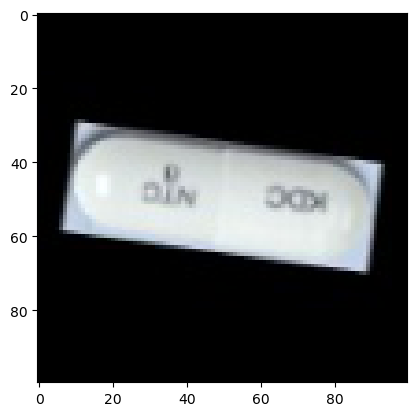

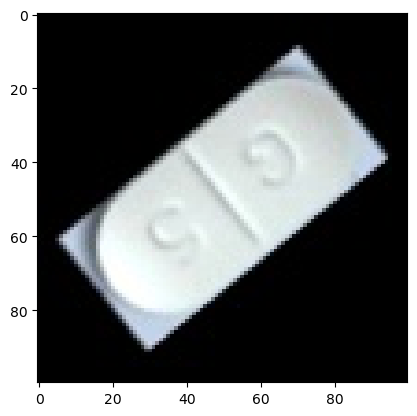

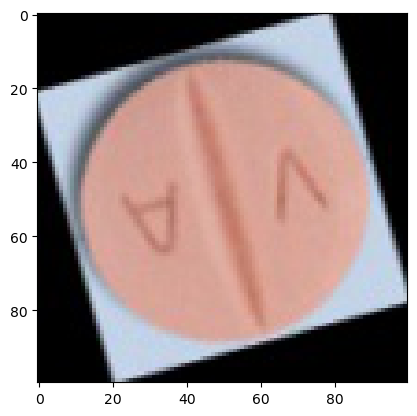

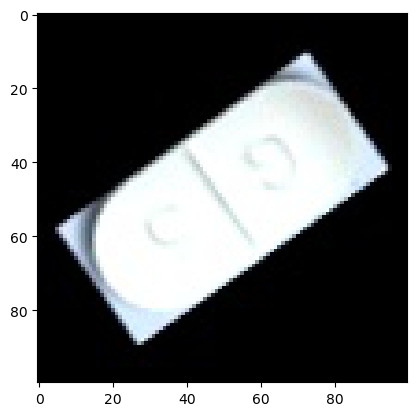

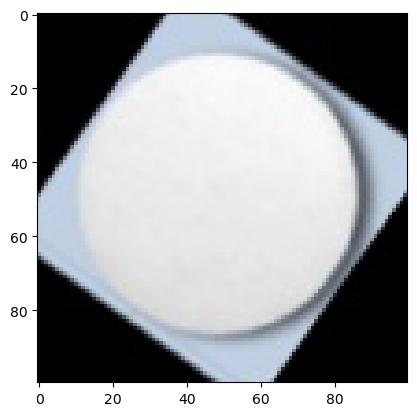

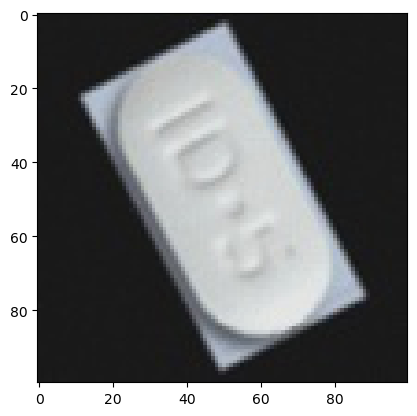

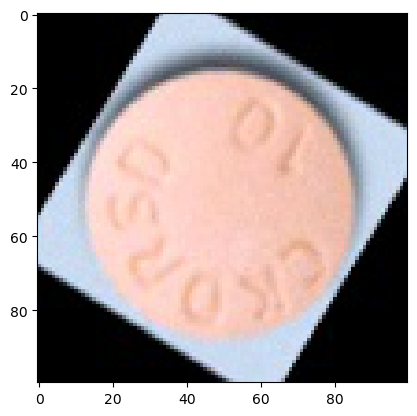

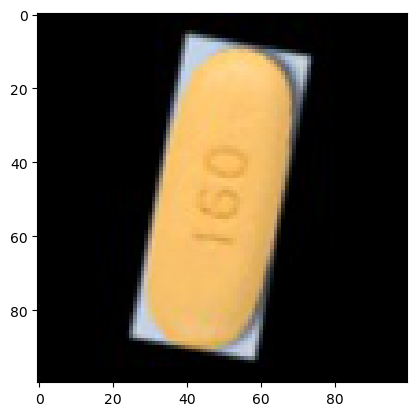

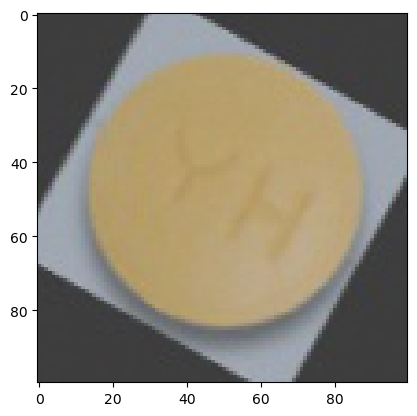

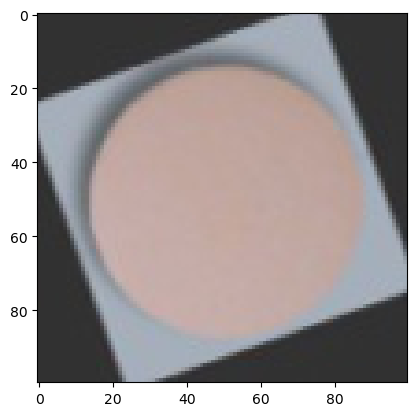

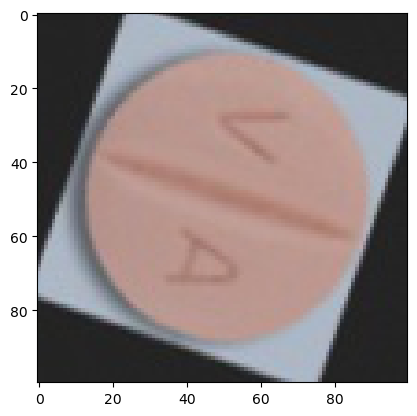

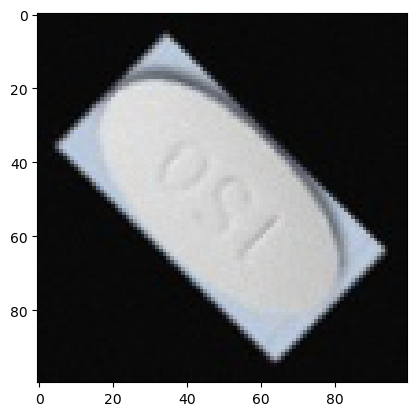

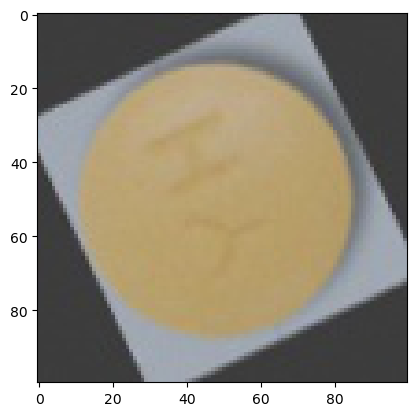

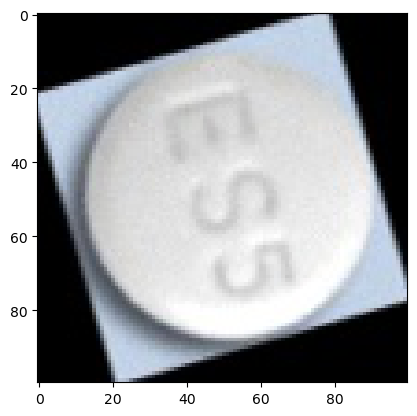

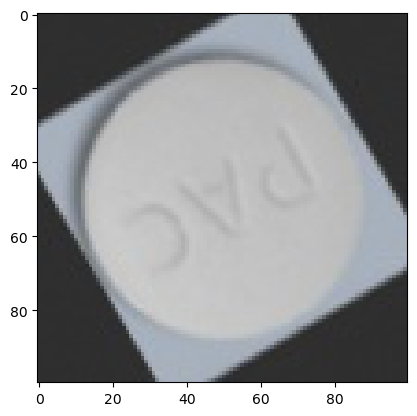

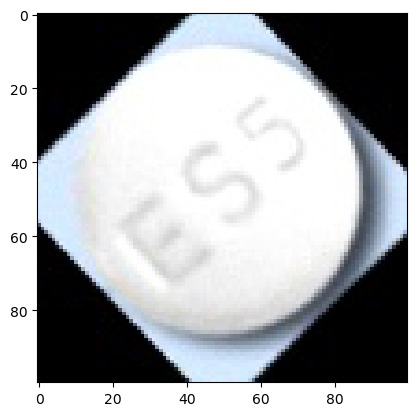

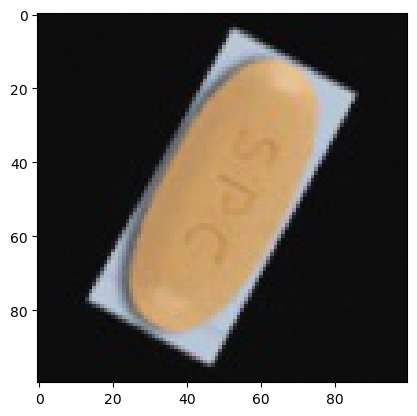

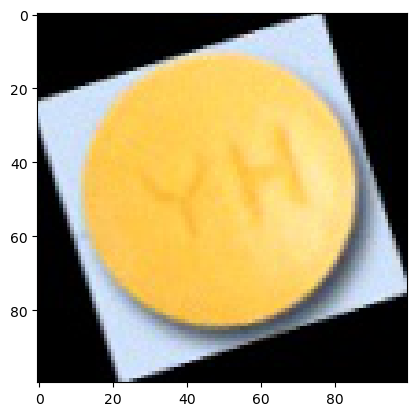

In [110]:
for image, label in train_dataset.take(1):
  for i in range(N_BATCH):    
#     print(label[i].numpy())
    plt.imshow(image[i])
    plt.show()

In [111]:
from tensorflow.keras import models
from tensorflow.keras.preprocessing.image import load_img,img_to_array
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2,preprocess_input
from tensorflow.keras.layers import Conv2D, ReLU, MaxPooling2D, Dense, BatchNormalization, GlobalAveragePooling2D

In [112]:
mobilenetv2 = MobileNetV2(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))

9406464/9406464 [==============================] - 1s 0us/step


In [113]:
mobilenetv2.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 50, 50, 32)   864         ['input_1[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 50, 50, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 50, 50, 32)   0           ['bn_Conv1[0][

In [114]:
def create_mv_model():
    # 새로운 모델 생성하기
    last = mobilenetv2.output
    x = GlobalAveragePooling2D()(last)
    x = Dense(256)(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    pred = Dense(N_CLASS, activation='softmax')(x)
    
    model = Model(mobilenetv2.input, pred)
    model.summary
    return model

In [115]:
## Create model, compile & summary
model = create_mv_model()

LR_INIT = 0.000001
LR_MAX = 0.0002
LR_MIN = LR_INIT
RAMPUP_EPOCH = 4
EXP_DECAY = 0.9

def lr_schedule_fn(epoch):
  if epoch < RAMPUP_EPOCH:
    lr = (LR_MAX - LR_MIN) / RAMPUP_EPOCH * epoch + LR_INIT
  else:
    lr = (LR_MAX - LR_MIN) * EXP_DECAY**(epoch - RAMPUP_EPOCH)
  return lr

lr_callback = keras.callbacks.LearningRateScheduler(lr_schedule_fn)

model.compile(optimizer=tf.keras.optimizers.Adam(LR_INIT),
              loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.1),
              metrics=['accuracy'])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 50, 50, 32)   864         ['input_1[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 50, 50, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 50, 50, 32)   0           ['bn_Conv1[0][0]']           

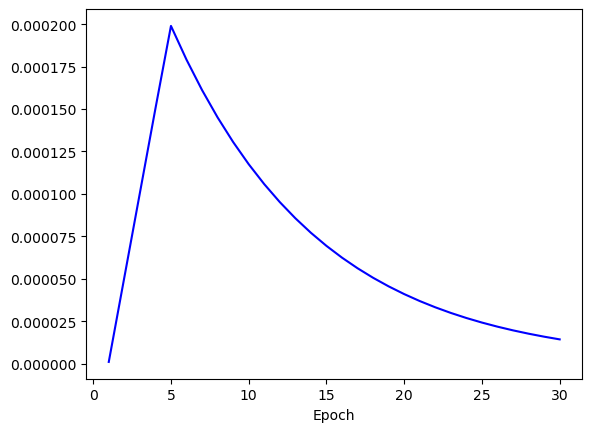

In [116]:
def plot_lr():
  lr = []
  epoch_list = list(np.arange(N_EPOCHS) + 1)
  for epoch in range(N_EPOCHS):
    lr.append(lr_schedule_fn(epoch))    
  plt.plot(epoch_list, lr, 'b-')
  plt.xlabel('Epoch')
  plt.show()

plot_lr()

In [117]:
history = model.fit(
    train_dataset,
    epochs=N_EPOCHS,
    steps_per_epoch=steps_per_epoch,
    validation_data=val_dataset,
    validation_steps=validation_steps,
    callbacks=[lr_callback]
)

Epoch 1/30


2024-10-06 20:25:03.093902: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [1]
	 [[{{node Placeholder/_0}}]]
2024-10-06 20:25:03.094202: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [1]
	 [[{{node Placeholder/_0}}]]


  27/1000 [..............................] - ETA: 4:47 - loss: 3.4026 - accuracy: 0.0472

KeyboardInterrupt: 